## <span style='background:yellow; color:red'> Remember:</span>

+ Navigate to your `fmad2223` folder in the console  
+ Execute `git pull origin main` to update the code
+ **Do not modify the files in that folder**, copy them elsewhere

# Populations and Samples

+ The main goal of Statistics is to obtain reliable and useful information about a **population** of interest using **samples** from that population. The term population is used here in a broad sense to refer to any collection of individual entities, not just living creatures. A population can be the set of vehicles with license plates from year 2015, the buying orders received by a company a given month or the hummingbirds that visit a bird feeder during a certain week somewhere in Costa Rica.  

+ Trying to get all the information of interest from all the individuals in a population is often impossible or pointless: too difficult, too expensive, too time consuming or in many cases, too harmful for the individuals in the population if the sampling process causes some degree of damage. That is where Statistics comes into play. Can we use some samples from the population to *infer* or *predict* what we want to know? In that sense a related question is: is the sample a good representation of the population?

+ **Inference** is the part of Statistics dealing with those questions, making them formal and providing answers with a mathematically sound basis.

![](fig/011-inferencePopulationSample.png)

## Simple Random Samples with Python

+ In the study of a population we are usually interested in certain properties or characteristics of the individuals, that may be different from one individual to another. These properties are the *variables of interest to us*. When sampling a population we get the values of those variables in a sample of some individuals from that population. 

+ In order for the sampling process to provide us with a representative sample, we often take what is called a **simple random sample**. That is, we choose individuals from the population at random so that:
    + All individuals in the population are *equally likely* to be chosen for the sample.
    + We sample with *replacement*. That is, an individual can be chosen twice for the same sample. 

+ Let us see a very simple example, suing synthetic data. In the following code we create a `Population` data set of `N = 158000` individuals. The example is inspired by the number of passengers at the Madrid airport some days and the variable `Ages` represents the (entirely fictitious) ages of those passengers. This example is unrealistic in that we have the whole set of ages for each and every passenger. The blue dashed line represents the *population* age. In this case we can ask Python to tell us the value, but where would be the fun in doing that? Instead, let us try to come up with a good guess of that mean.

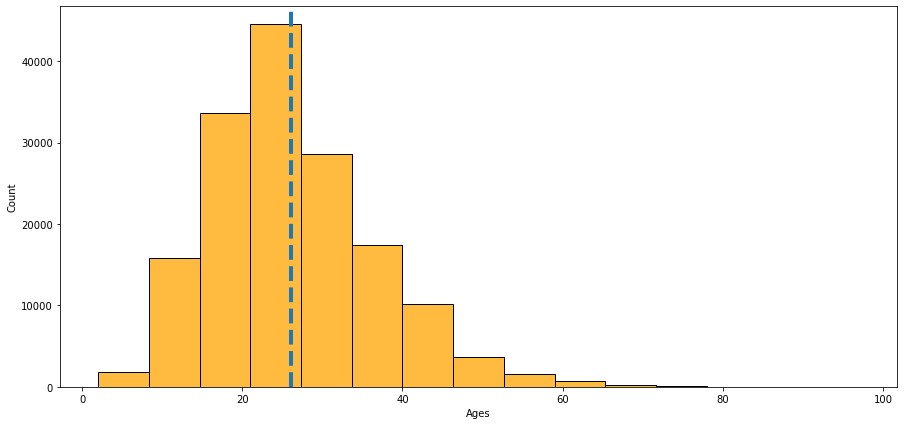

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(2022) # seed for reproducibility

N = 158000
Ages = np.rint(2 * rng.chisquare(df = 13, size = N)).astype(int)
Population = pd.DataFrame({'Ages':Ages})

Population.head(10)

sns.histplot(data = Population, x = 'Ages', bins=15, color = "orange")
getPlot = plt.axvline(x = Population.Ages.mean(), linewidth = 4, linestyle='--')


+ Guesing the population mean is just the type of question that we expect Statistics to answer. So we will take random samples from the population in order to make our guess. Let us begin by taking a sample of 20 individuals ages.

In [63]:
n = 20 # sample size

sample = Population.sample(n)

print(sample) # The index reflects the row lines in the original data set

print("\n" * 2, "Sample mean = ", sample.mean())

Ages    2
dtype: int64
        Ages
60729     25
157460    22
89531     24
118650    13
136336    14
71548     20
91451     45
115181    18
58364     23
118439    24
88341     29
101284    13
152635     9
22273     19
56193     13
43631     35
47339     41
6745      27
46703     26
20583     27


 Sample mean =  Ages    23.35
dtype: float64


+ Execute the above cell a few times. Every time you will get a different sample and a new sample mean:  

$$\bar x = \dfrac{x_1 + x_2 +\cdots + x_{20}}{20}$$

+ How different can these sample means be from one another and from the population mean? How *bad* can a sample be? Recall that we are sampling with replacement. Therefore, since there is a passenger with `age = 2` the following sample is a perfeclty legit sample:

$$x_1 = 2,\, x_2 = 2,\,  \ldots \, , x_{20}$$

+ This sample would make us guess that the population sample is 2, which is way off from the true value (look at the histogram). In that sense this is a very, very bad sample (as bad as they get).   

+ But remember, *we are taking random samples (with replacement)* How probable is it that we get this particularly bad sample **at random**?

+ Which leads us to one of the more crucial steps in understanding the inner workings of Statistics. To answer the question at the end of the last paragraph we need to answer this two questions:
    + how many different samples exist?
    + how is the *sample mean* distributed over those samples? In other words, how many *good* and *bad* samples exist when it comes to guessing the mean of the population?
    
  Let us begin with the first question. The number of different samples is this Unconceivably large number:
  
  $$158000^{20} \approx 9.4003005\times 10^{103}$$
  
  To put this in pespective the number of stars in the universe is estimated to be less than $10^{40}$. 


# Basic Probability

# Bayes Rule

# Contingency Tables